# Explorar os dados (EDA - Análise Exploratória)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as snb

### Rodando a Base

In [2]:
data_frame_heart = pd.read_csv('base/heart.csv')

### Forma e Descrição da Base

In [3]:
print(data_frame_heart.shape)
print("="*30)
print(data_frame_heart.isnull().sum())
print("="*30)
data_frame_heart.info()

(918, 12)
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dt

### Primeiros Dados

In [4]:
data_frame_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Últimos Dados

In [5]:
data_frame_heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### Corrigindo Valores Nulos

In [6]:
df = data_frame_heart
# Colunas com valores de zero que são clinicamente impossíveis
cols_to_correct = ["RestingBP", "Cholesterol"]

# Substituir 0 por NaN (Not a Number) para que possamos calcular a mediana corretamente
for col in cols_to_correct:
    df[col] = df[col].replace(0, np.nan)

# Calcular a mediana de cada coluna (ignorando os NaN) e preencher os valores faltantes
for col in cols_to_correct:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Valores nulos após a correção:")
print(df[cols_to_correct].isnull().sum())
print("\nNovas estatísticas descritivas:")
print(df[cols_to_correct].describe())

data_frame_heart = df


Valores nulos após a correção:
RestingBP      0
Cholesterol    0
dtype: int64

Novas estatísticas descritivas:
        RestingBP  Cholesterol
count  918.000000   918.000000
mean   132.538126   243.204793
std     17.990127    53.401297
min     80.000000    85.000000
25%    120.000000   214.000000
50%    130.000000   237.000000
75%    140.000000   267.000000
max    200.000000   603.000000


### Análise Descritiva

In [7]:
data_frame_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Box Plot HeartDiaseases vs Age

<Axes: xlabel='HeartDisease', ylabel='Age'>

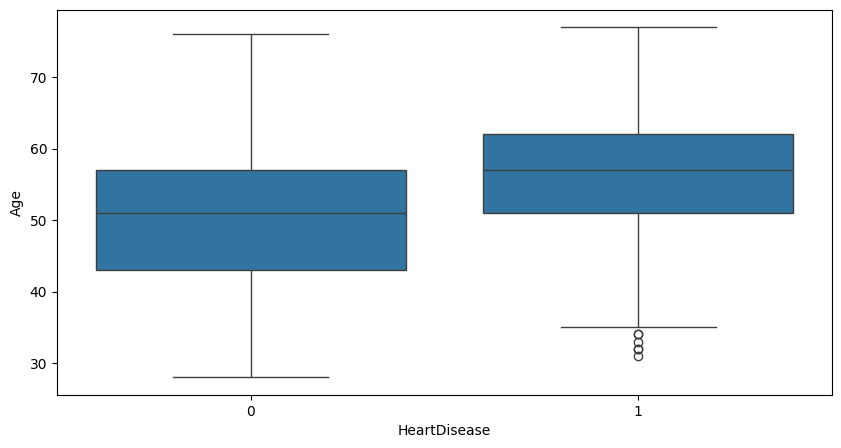

In [8]:
plt.figure(figsize=(10, 5))
snb.boxplot(data=data_frame_heart, x="HeartDisease", y="Age")

### Verificando o Balanceamento das Variáveis Dependentes
* Quanto mais próximos os valores melhor

In [9]:
data_frame_heart["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

### Relação entre Idade e Frequência Cardíaca Máxima

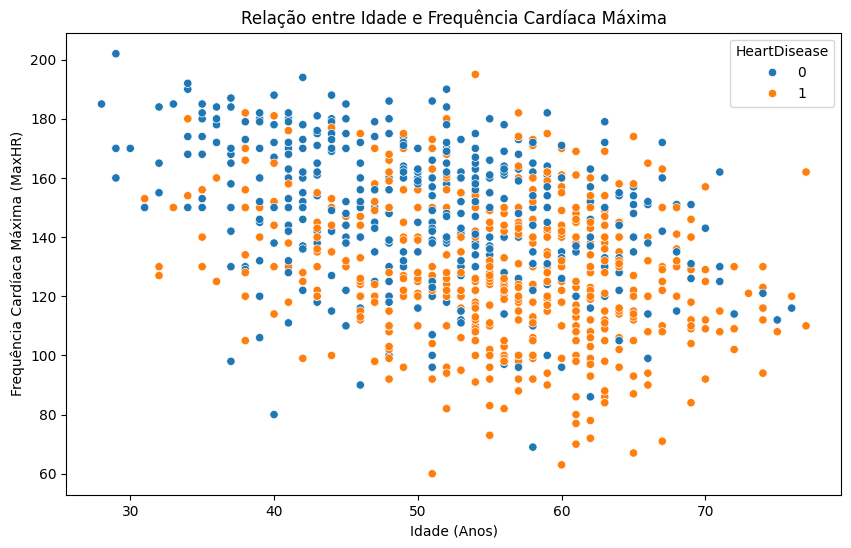

In [10]:
plt.figure(figsize=(10, 6))
df = data_frame_heart
snb.scatterplot(x=df["Age"], y=df["MaxHR"], hue=df["HeartDisease"])

plt.title("Relação entre Idade e Frequência Cardíaca Máxima")
plt.xlabel("Idade (Anos)")
plt.ylabel("Frequência Cardíaca Máxima (MaxHR)")

plt.show()

### Histogramas

* Features Numericas

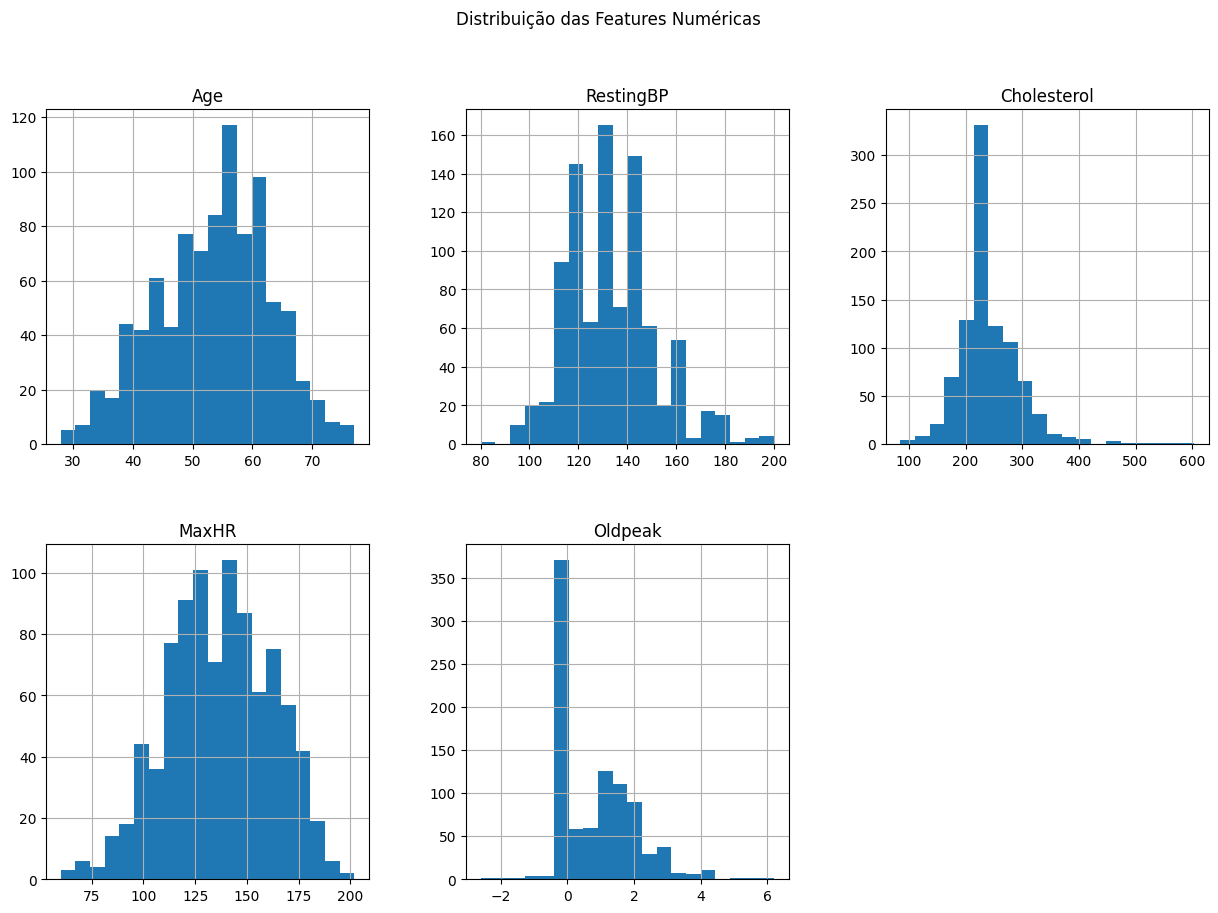

In [11]:
numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# Cria um histograma para cada feature numérica
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Distribuição das Features Numéricas")
plt.show()

* Features Categóricas

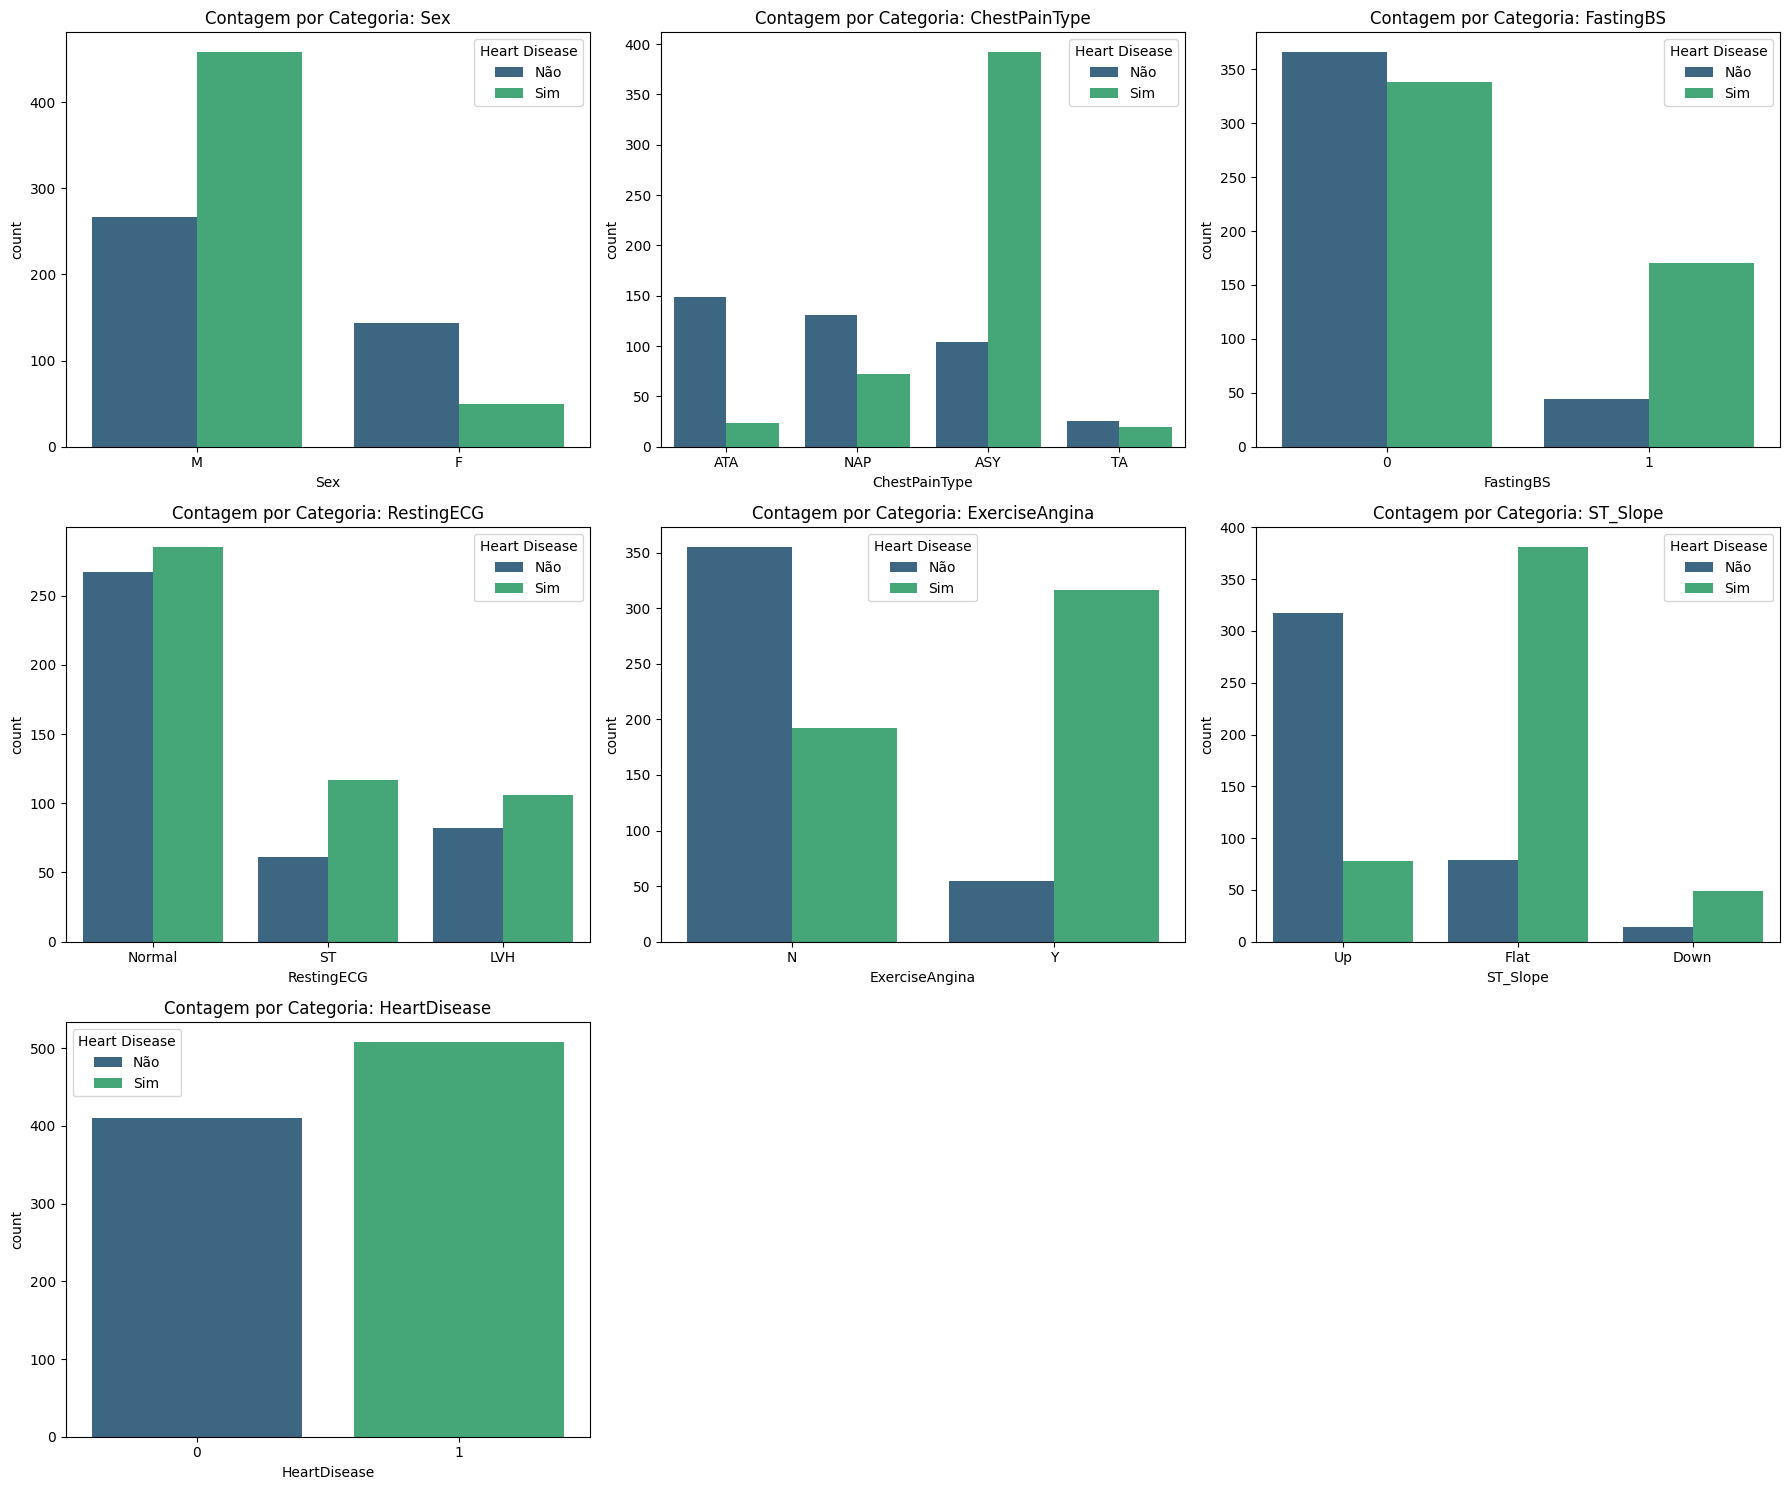

In [12]:
# Seleciona as colunas que parecem ser categóricas (incluindo a variável alvo para análise)
categorical_features = [
    "Sex",
    "ChestPainType",
    "FastingBS",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
    "HeartDisease",
]

plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)  # Cria uma grade de plots
    snb.countplot(x=feature, data=df, hue="HeartDisease", palette="viridis")
    plt.title(f"Contagem por Categoria: {feature}")
    plt.legend(title="Heart Disease", labels=["Não", "Sim"])

plt.tight_layout()
plt.show()

* Disposição de Homes e Mulheres nos Dados

<Axes: xlabel='Sex', ylabel='count'>

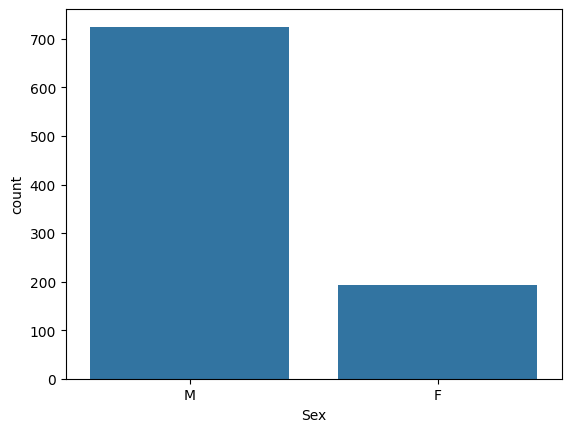

In [13]:
snb.countplot(x="Sex", data=df)